# Data Interpolation

Data Interpolation is the process of estimating unknown values within a dataset based on the known values. In python , there are various libraries available that can be used for data interpolation , such as Numpy , Scipty and Pandas. here is an example of how to perform data interpolation using the numpy libarary.


### 1. Linear Interpolation

In [1]:
import numpy as np

In [ ]:
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

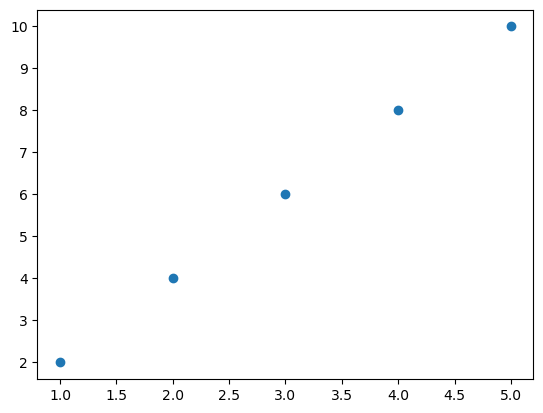

In [8]:
# interpolate the data using linear interpolation
import matplotlib.pyplot as plt 
plt.scatter(x,y)

🔹 np.linspace(start, stop, num)

📌 Parameters:

> start:

- The beginning value of the interval.
- In your example, start = 1

- So the generated numbers will begin at 1.

> stop:
- The end value of the interval.
- In your example, stop = 5
- The generated numbers will go up to 5 including it (by default).

> num:
- The total number of evenly spaced values to generate between start and stop.
- In your example, num = 10
- So NumPy will give you 10 numbers from 1 to 5, spaced evenly.

> 🔍 What does "evenly spaced" mean?

It means the distance between each number is the same.

To calculate the spacing (called the step size), you can use:

- step=stop−start / num−1

In your case:
- step= 5−1 / 10−1=4/9≈0.444

So the numbers would be approximately:

[1.0, 1.444, 1.889, 2.333, 2.778, 3.222, 3.667, 4.111, 4.556, 5.0]

---

np.intercp(x,xp,fp)

- x  :- The new x-values where you want to estimate the output (i.e., where to interpolate).
- xp :- The known x-values (must be sorted in increasing order).
- fp :- The known y-values corresponding to xp


>we tell these are new points of x , and here are old x and y points based on these old points calculate what are the values of these point on y axis

[1.         1.44444444 1.88888889 2.33333333 2.77777778 3.22222222
 3.66666667 4.11111111 4.55555556 5.        ]
[ 2.          2.88888889  3.77777778  4.66666667  5.55555556  6.44444444
  7.33333333  8.22222222  9.11111111 10.        ]


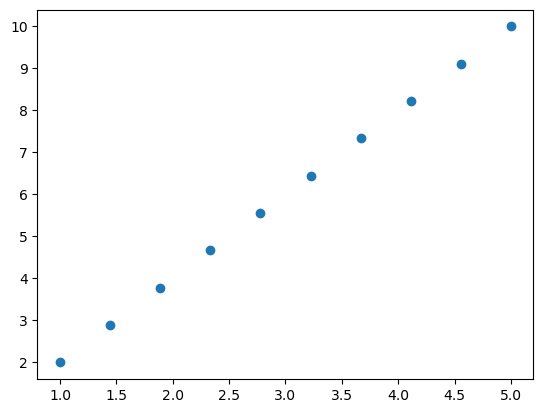

In [16]:
x_new = np.linspace(1,5,10) ## create new x values
y_interp = np.interp(x_new,x,y) # interpolate y values at new x values
print(x_new)
print(y_interp)
plt.scatter(x_new,y_interp)

### Cubic Interpolation

In [17]:
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

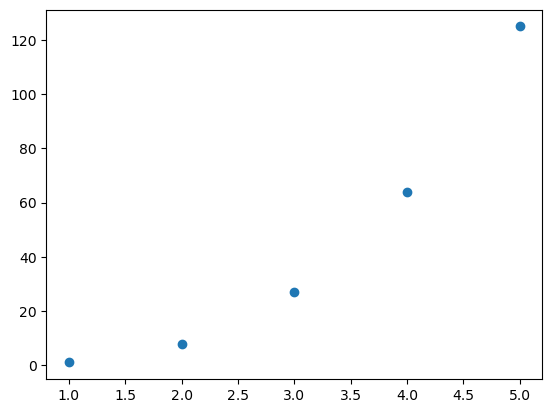

In [18]:
plt.scatter(x,y)

In [20]:
# np.interp() just connects the dots with straight lines. so we scipy 

from scipy.interpolate import interp1d

In [21]:
# create a cubic itnerpolation function
f= interp1d(x,y,kind='cubic')


In [22]:
x_new = np.linspace(1,5,10) ## create new x values for interpolation
y_interp = f(x_new) # interpolate y values at new x values
print(y_interp) 

[  1.           3.01371742   6.739369    12.7037037   21.43347051
  33.45541838  49.2962963   69.48285322  94.54183813 125.        ]


In [25]:
import plotly.express as px
fig = px.scatter(x=x_new,y=y_interp)
fig.show()

In [28]:
x_new = np.linspace(1,5,9) ## create new x values for interpolation
y_interp = f(x_new) # interpolate y values at new x values
print(y_interp) 
import plotly.express as px
fig = px.scatter(x=x_new,y=y_interp)
fig.show()


[  1.      3.375   8.     15.625  27.     42.875  64.     91.125 125.   ]


### Polynomial Interpolation

In [36]:
x=np.array([1,2,3,4,5])
y=np.array([1,4,9,16,25])

p = np.polyfit(x,y,2) # degree refers to the highest power of the variable in the polynomial used to approximate data points

x_new = np.linspace(1,5,30)
y_interp = np.polyval(p,x_new) # evaluate the polynomial at new x values

px.scatter(x=x_new,y=y_interp).show()

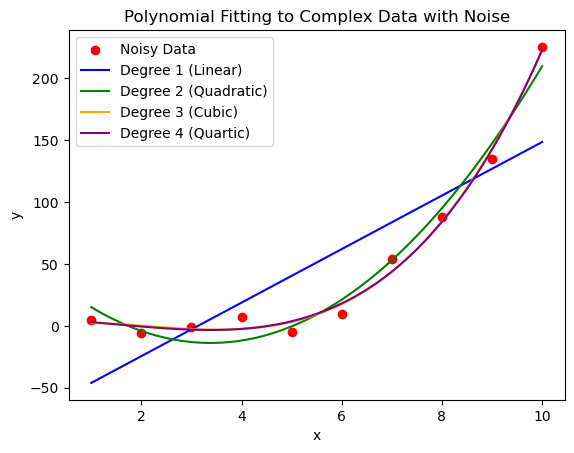

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Create some complex data with noise
np.random.seed(42)
x = np.linspace(1, 10, 10)  # 10 data points
y = 0.5 * x**3 - 3 * x**2 + 2 * x + np.random.normal(0, 10, size=x.shape)  # Cubic data with noise

# Fit polynomials of different degrees
p_deg1 = np.polyfit(x, y, 1)  # Degree 1 (linear)
p_deg2 = np.polyfit(x, y, 2)  # Degree 2 (quadratic)
p_deg3 = np.polyfit(x, y, 3)  # Degree 3 (cubic)
p_deg4 = np.polyfit(x, y, 4)  # Degree 4 (quartic)

# Evaluate the polynomials at new x values
x_new = np.linspace(1, 10, 100)  # More points for smooth curve
y_deg1 = np.polyval(p_deg1, x_new)
y_deg2 = np.polyval(p_deg2, x_new)
y_deg3 = np.polyval(p_deg3, x_new)
y_deg4 = np.polyval(p_deg4, x_new)

# Plot the data and the polynomial fits
plt.scatter(x, y, color='red', label='Noisy Data')
plt.plot(x_new, y_deg1, label='Degree 1 (Linear)', color='blue')
plt.plot(x_new, y_deg2, label='Degree 2 (Quadratic)', color='green')
plt.plot(x_new, y_deg3, label='Degree 3 (Cubic)', color='orange')
plt.plot(x_new, y_deg4, label='Degree 4 (Quartic)', color='purple')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fitting to Complex Data with Noise')
plt.show()


The degree of a polynomial controls how flexible the model is. A degree that is too low may underfit (miss patterns), while a degree that is too high may overfit (capture noise), reducing the model's ability to generalize to new data.

Let’s say you’re building a model to predict housing prices based on features like square footage, number of bedrooms, etc. Here’s how these terms apply:

    Capturing Noise:

        Imagine a house listing that has an unusually low price because it’s located in a neighborhood with construction work going on, causing a temporary dip in value. This low price is an outlier and doesn’t reflect the general trend of housing prices in the area.

        If your model tries to fit this outlier exactly (because it's part of the training data), it will capture the noise — the temporary, non-representative dip in price.

    Random Fluctuations:

        Let’s say you observe that housing prices have some unpredictable fluctuation in certain months due to local events (e.g., festivals, holidays). These fluctuations don’t follow a pattern you can easily predict from the features (like square footage or number of bedrooms).

        If your model focuses too much on predicting these small, random fluctuations, it will start fitting the noise in the data rather than the main, underlying trend of housing prices based on square footage, number of bedrooms, etc.

    Not Generalizing to New Data:

        After your model fits the training data, you want it to perform well on new, unseen data. But if your model is overfitting — meaning it learned the random fluctuations or noise in the training data — it may predict poorly on new housing listings because the same fluctuations won’t appear in the new data.

        This is why a model that has overfitted to the noise or random fluctuations in the training data won’t generalize to new data: it’s too tailored to the quirks of the training data and doesn’t recognize the broader, true patterns that apply to other listings.

Overfitting occurs when the model "learns" these non-representative details (noise) from the training data, making it too specialized to that data.

Underfitting occurs when the model fails to learn the underlying patterns in the data, making it too simplistic or too rigid. As a result, it doesn't capture important relationships and performs poorly on both the training data and new, unseen data.